In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from scipy import interpolate

## CO2 Data

In [44]:
# Reading data
df = pd.read_csv("co2_clean.csv")

In [45]:
# Creating a time column
df["time"] = [(i+0.5)/12 for i in range(df.shape[0])]

In [46]:
# Dropping missing values: all co2 concentrations reported as -99 will be filtered off
dt_frac_df = df[['time', 'co2_ppm']].query("co2_ppm > 0")

In [47]:
# Looking at the description of the data
dt_frac_df.describe()

,time,co2_ppm
count,734.000000,734.000000
mean,31.142144,354.763801
std,17.708108,28.095893
min,0.208333,313.210000
25%,15.895833,329.320000
50%,31.166667,352.180000
75%,46.437500,377.422500
max,61.708333,414.830000


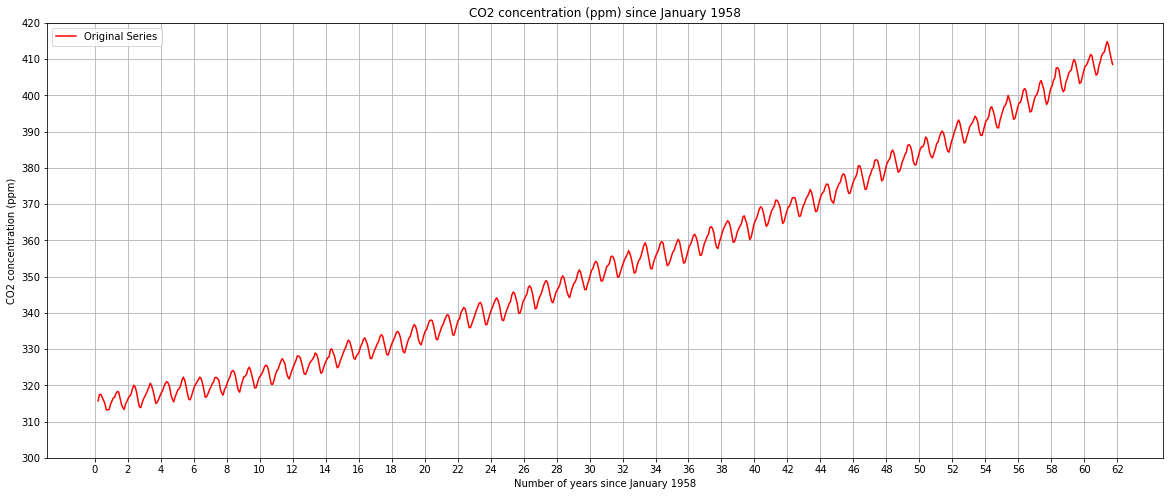

In [83]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Create a line plot for CO2 concentration
plt.plot(dt_frac_df.time.values, dt_frac_df.co2_ppm.values, c='red', label='Original Series')
# Create a line plot for CO2 concentration
#plt.errorbar(periodic_signal_df.month, periodic_signal_df.residual_mean, yerr=periodic_signal_df.residual_std, fmt='o', color='r', ecolor='k', capsize=4)

# Set labels and title
plt.xlabel('Number of years since January 1958')
plt.ylabel('CO2 concentration (ppm)')
plt.title('CO2 concentration (ppm) since January 1958')

# Add a legend
plt.legend()

# Set y-axis limits
plt.ylim(300, 420)

# Set the number of y-axis ticks
plt.yticks([300 + i*10 for i in range(13)])

# Set x-axis tick positions and labels
plt.xticks([m for m in range(0, 64, 2)])

# Enable gridlines in the background
plt.grid(True)

# Display the plot
plt.show()


In [48]:
## Splitting the data

# Defining train percentage
percentage_train = 0.8

# Defining train size
n_train = int(dt_frac_df.shape[0]*percentage_train)

# Splitting
X_train = dt_frac_df.time.values[0:n_train].reshape(-1,1)
y_train = dt_frac_df.co2_ppm.values[0:n_train]
X_test = dt_frac_df.time.values[n_train:].reshape(-1,1)
y_test = dt_frac_df.co2_ppm.values[n_train:]

## Linear Model

In [49]:
# Fitting regression model
lr = LinearRegression().fit(X_train, y_train)

In [50]:
alpha1 = lr.coef_[0]
alpha0 = lr.intercept_
print(f"Linear model: F1(t) ~ {alpha0} + {alpha1}t")

Linear model: F1(t) ~ 308.9916567323666 + 1.4066911494215175t


In [51]:
# Calculating the residual
r_train = np.array([y - alpha0 - alpha1*t for t, y in zip(X_train[:,0], y_train)])

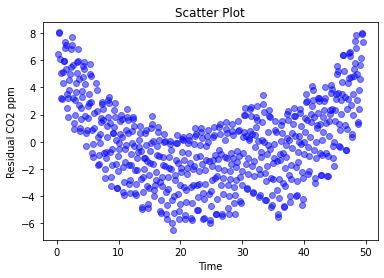

In [52]:
# Create scatter plot
plt.scatter(X_train, r_train, c='blue', alpha=0.5)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Residual CO2 ppm')
plt.title('Scatter Plot')

# Display the plot
plt.show()


In [53]:
# Calculating predictions
y_pred = lr.predict(X_test)

In [54]:
# Calculating RMSE and MAPE
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred)**0.5 
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)
print(f"RMSE: {rmse} | MAPE: {mape}")

RMSE: 10.641458521874679 | MAPE: 0.024504549564431446


## Quadratic Model

In [55]:
# Fitting to a quadratic model
dt_frac_df['time2'] = dt_frac_df['time']**2

# Splitting
X_train_sqr = dt_frac_df[['time', 'time2']].values[0:n_train]
X_test_sqr = dt_frac_df[['time', 'time2']].values[n_train:]

In [56]:
# Fitting regression model
lr_sqr = LinearRegression().fit(X_train_sqr, y_train)

In [57]:
beta1 = lr_sqr.coef_[0]
beta2 = lr_sqr.coef_[1]
beta0 = lr_sqr.intercept_
print(f"Linear model: F2(t) ~ {beta0} + {beta1}t + {beta2}t^2")

Linear model: F2(t) ~ 314.1005841870842 + 0.802097021160315t + 0.01211749969812116t^2


In [58]:
# Calculating the residual
r_train_sqr = np.array([y - beta0 - beta1*t - beta2*(t**2) for t, y in zip(X_train[:,0], y_train)])

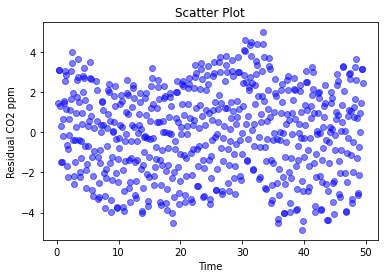

In [59]:
# Create scatter plot
plt.scatter(X_train, r_train_sqr, c='blue', alpha=0.5)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Residual CO2 ppm')
plt.title('Scatter Plot')

# Display the plot
plt.show()


In [60]:
# Calculating predictions
y_pred_sqr = lr_sqr.predict(X_test_sqr)

In [61]:
# Calculating RMSE and MAPE
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred_sqr)**0.5 
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_sqr)
print(f"RMSE: {rmse} | MAPE: {mape}")

RMSE: 2.5013322194897873 | MAPE: 0.005320319129740862


## Creating an Auto-correlation Model

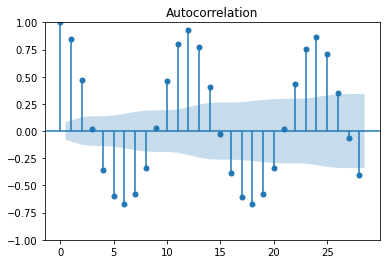

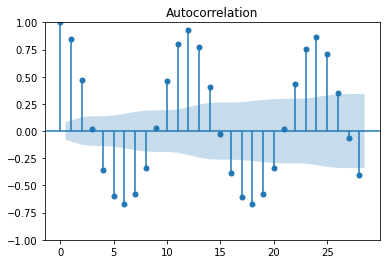

In [62]:
sm.graphics.tsa.plot_acf(r_train_sqr)

c:\Users\wr2zzgx\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


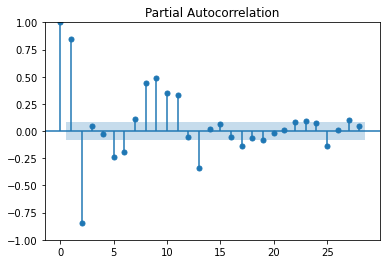

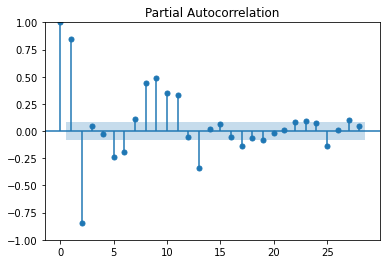

In [63]:
sm.graphics.tsa.plot_pacf(r_train_sqr)

In [64]:
# Reading data
df = pd.read_csv("co2_clean.csv")
df['counter'] = 1

In [65]:
# Creating a time column
df["time"] = [(i+0.5)/12 for i in range(df.shape[0])]

In [66]:
# Dropping missing values: all co2 concentrations reported as -99 will be filtered off
clean_df = df[['time', 'co2_ppm']].query("co2_ppm > 0")

In [67]:
# Creating interpolation function
func_interpol = interpolate.interp1d(clean_df.time, clean_df.co2_ppm)

In [68]:
# Creating a time column
df["co2_ppm_interpol"] = [func_interpol(t) if t > 0.2 and t < 61.79 else -99 for t in df.time]

In [69]:
interpol_df = (
    # Selecting complete 61 years from Oct-1958 to Sep-2019
    df
    .query("time > 0.71")  # Selecting all values after Oct-1958
    .query("time < 61.79") # Selecting all values before Sep-2019
    .assign(co2_ppm_adj = lambda x:np.where(x.co2_ppm < 0, x.co2_ppm_interpol, x.co2_ppm)) # Using interpolated value to replace missing values
    .assign(time2 = lambda x:x.time**2) # Calculating time squared to fit a quadratic model
    [['month', 'time', 'time2', 'co2_ppm_adj']] # Selecting columns
)

In [70]:
## Splitting the data

# Defining train percentage
percentage_train = 0.8

# Defining train size
n_train = int(interpol_df.shape[0]*percentage_train)

# Splitting
X_tr = interpol_df[['time', 'time2']].values[0:n_train]
X_tt = interpol_df[['time', 'time2']].values[n_train:]
y_tr = interpol_df.co2_ppm_adj.values[0:n_train]
y_tt = interpol_df.co2_ppm_adj.values[n_train:]

In [71]:
# Fitting regression model
lr_sqrt = LinearRegression().fit(X_tr, y_tr)

In [72]:
beta1 = lr_sqrt.coef_[0]
beta2 = lr_sqrt.coef_[1]
beta0 = lr_sqrt.intercept_
print(f"Linear model: F2(t) ~ {beta0} + {beta1}t + {beta2}t^2")

Linear model: F2(t) ~ 313.9826438386294 + 0.8122116357568369t + 0.011942523699692498t^2


In [73]:
# Calculating periodic signal
periodic_signal = [y - beta0 - beta1*t - beta2*(t**2) for t, y in zip(list(interpol_df.time), list(interpol_df.co2_ppm_adj))]

In [74]:
## Adding residual to interpol_df
interpol_df['residual'] = periodic_signal

In [75]:
# Creating a dataframe to hold the periodic pattern of the data
periodic_signal_df = (
    interpol_df[['month', 'residual']].groupby(['month']).mean().reset_index().rename(columns={'residual':'residual_mean'})
    .merge(interpol_df[['month', 'residual']].groupby(['month']).std().reset_index().rename(columns={'residual':'residual_std'}), how='left', on=['month'])
)

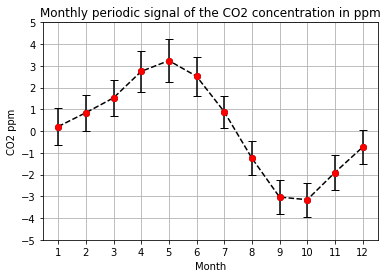

In [76]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create a line plot for CO2 concentration
#plt.scatter(periodic_signal_df.month, periodic_signal_df.residual, c='blue', alpha=0.5)
plt.plot(periodic_signal_df.month, periodic_signal_df.residual_mean, marker='o', linestyle='--', color='k', markerfacecolor='r')

# Create a line plot for CO2 concentration
plt.errorbar(periodic_signal_df.month, periodic_signal_df.residual_mean, yerr=periodic_signal_df.residual_std, fmt='o', color='r', ecolor='k', capsize=4)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('CO2 ppm')
plt.title('Monthly periodic signal of the CO2 concentration in ppm')

# Set y-axis limits
plt.ylim(-5, 5)

# Set the number of y-axis ticks
plt.yticks([-5 + i*1 for i in range(11)])

# Set x-axis tick positions and labels
plt.xticks([m+1 for m in range(12)])

# Enable gridlines in the background
plt.grid(True)

# Display the plot
plt.show()


In [77]:
## Splitting the data

# Defining train percentage
percentage_train = 0.8

# Defining train size
n_train = int(interpol_df.shape[0]*percentage_train)

# Splitting
X_tr = interpol_df[['time', 'time2']].values[0:n_train]
X_tt = interpol_df[['time', 'time2']].values[n_train:]
y_tr = interpol_df.co2_ppm_adj.values[0:n_train]
y_tt = interpol_df.co2_ppm_adj.values[n_train:]

In [78]:
periodic_signal_interpol_df = (
    interpol_df
    .merge(periodic_signal_df, how='left', on=['month'])
    .rename(columns={'residual_mean':'periodic_signal'})
)

In [79]:
## Splitting the data

# Defining train percentage
percentage_train = 0.8

# Defining train size
n_train = int(interpol_df.shape[0]*percentage_train)

# Splitting
X_tr_p = periodic_signal_interpol_df[['time', 'periodic_signal']].values[0:n_train]
X_tt_p = periodic_signal_interpol_df[['time', 'periodic_signal']].values[n_train:]
y_tr_p = periodic_signal_interpol_df.co2_ppm_adj.values[0:n_train]
y_tt_p = periodic_signal_interpol_df.co2_ppm_adj.values[n_train:]

In [80]:
# Calculating periodic signal
y = np.array([beta0 + beta1*t + beta2*(t**2) + s for t, s in zip(periodic_signal_interpol_df.time.values, periodic_signal_interpol_df.periodic_signal.values)])

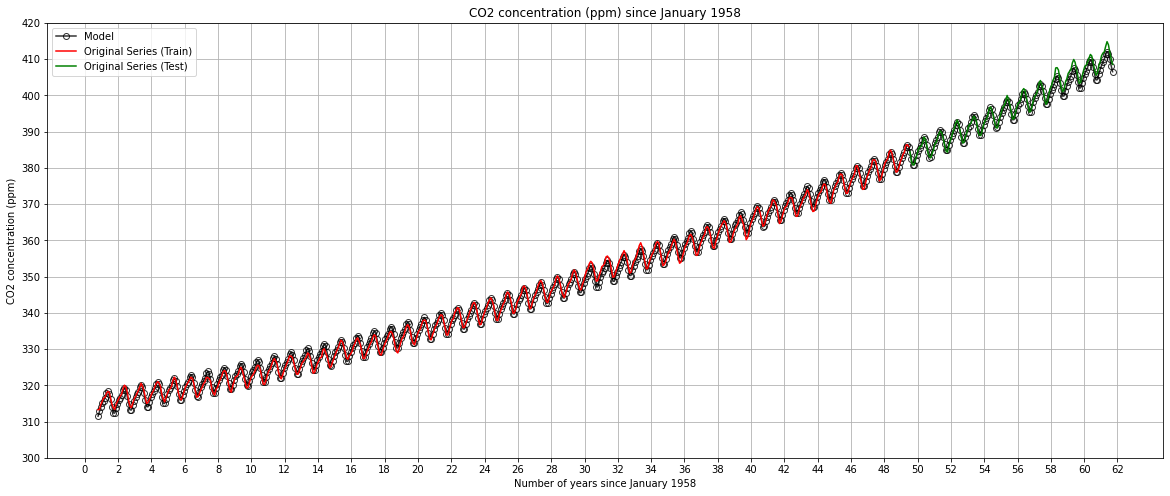

In [81]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Create a line plot for CO2 concentration
#plt.scatter(X_tr_p[:,0], y_tr_pred, c='red', alpha=0.4, label='Train Series')
plt.plot(periodic_signal_interpol_df.time.values, y, c='black', marker='o', markerfacecolor='none', alpha=0.8, label='Model')
#plt.plot(periodic_signal_interpol_df.time.values, y, c='black', linestyle='--', alpha=0.8, label='Model')
plt.plot(periodic_signal_interpol_df.time.values[0:n_train], periodic_signal_interpol_df.co2_ppm_adj.values[0:n_train], c='red', label='Original Series (Train)')
plt.plot(periodic_signal_interpol_df.time.values[n_train:], periodic_signal_interpol_df.co2_ppm_adj.values[n_train:], c='green', label='Original Series (Test)')

# Create a line plot for CO2 concentration
#plt.errorbar(periodic_signal_df.month, periodic_signal_df.residual_mean, yerr=periodic_signal_df.residual_std, fmt='o', color='r', ecolor='k', capsize=4)

# Set labels and title
plt.xlabel('Number of years since January 1958')
plt.ylabel('CO2 concentration (ppm)')
plt.title('CO2 concentration (ppm) since January 1958')

# Add a legend
plt.legend()

# Set y-axis limits
plt.ylim(300, 420)

# Set the number of y-axis ticks
plt.yticks([300 + i*10 for i in range(13)])

# Set x-axis tick positions and labels
plt.xticks([m for m in range(0, 64, 2)])

# Enable gridlines in the background
plt.grid(True)

# Display the plot
plt.show()


In [84]:
(10**0.5-1)/0.5

4.324555320336759

In [85]:
(10**2-1)/2

49.5